#**Linear Regression Model training on diamond dataset:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

Load dataset

In [ ]:
df = pd.read_csv("/content/diamonds[1].csv")

##**Analysis the dataset:**

In [ ]:
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [ ]:
df.tail()

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
df.describe()

Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

Check null value in dataframe:

In [ ]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Drop Unnamed column because it does not play any significant role in model training

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

Rename the column to understand the role of feature in the dataset

In [ ]:
df = df.rename(columns = {"depth":"total depth %","x":"length", "y":"width", "z":"depth"})

In [ ]:
df.head()

carat      cut color clarity  total depth %  table  price  length  width  \
0   0.23    Ideal     E     SI2           61.5   55.0    326    3.95   3.98   
1   0.21  Premium     E     SI1           59.8   61.0    326    3.89   3.84   
2   0.23     Good     E     VS1           56.9   65.0    327    4.05   4.07   
3   0.29  Premium     I     VS2           62.4   58.0    334    4.20   4.23   
4   0.31     Good     J     SI2           63.3   58.0    335    4.34   4.35   

   depth  
0   2.43  
1   2.31  
2   2.31  
3   2.63  
4   2.75

Analyse the data via data visualization:

In [ ]:
def hisplot(features):
  sns.histplot(features, kde=False)
  plt.show()

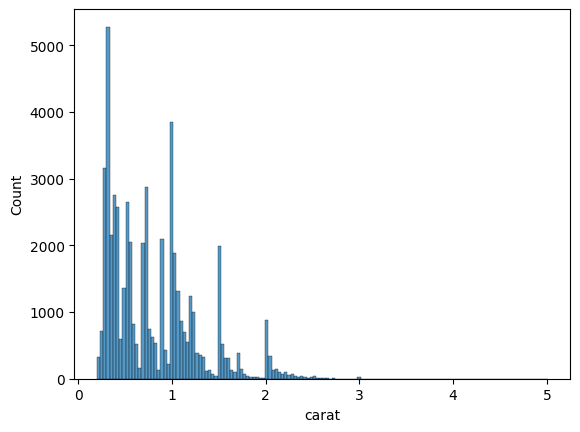

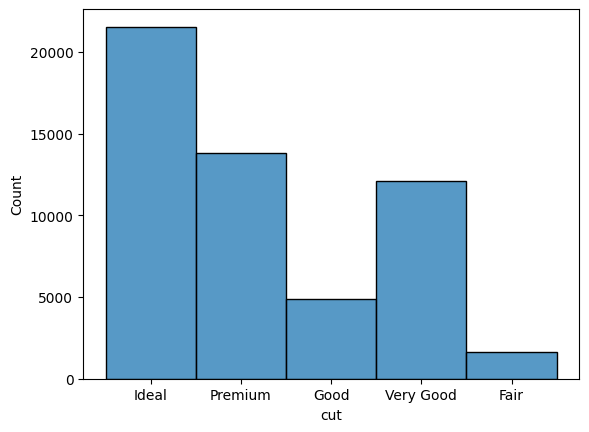

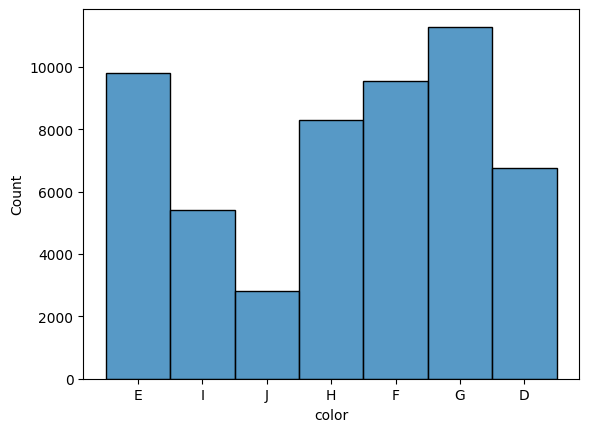

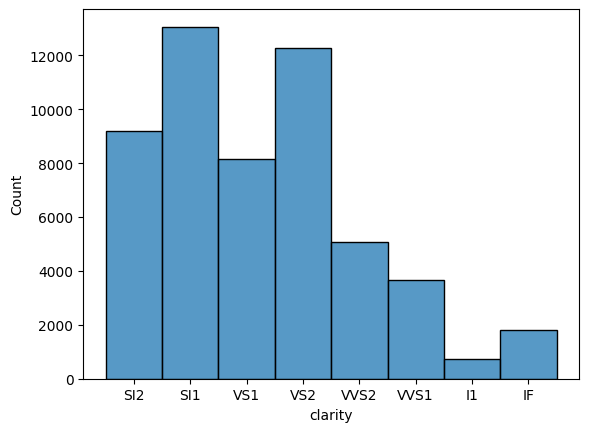

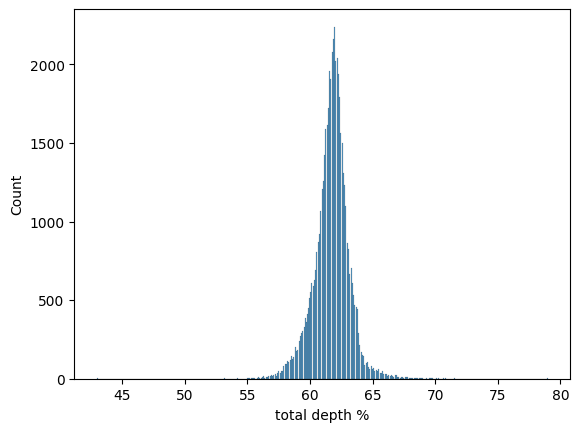

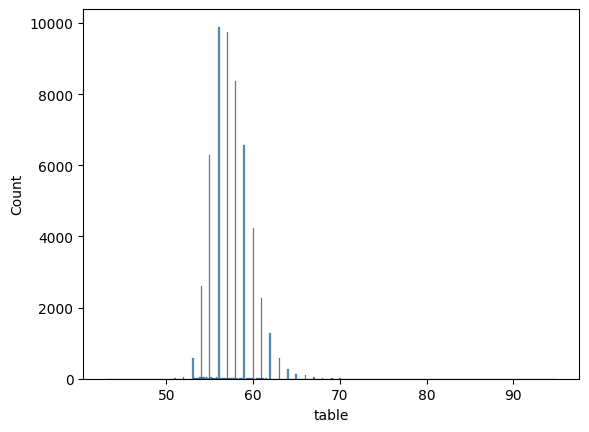

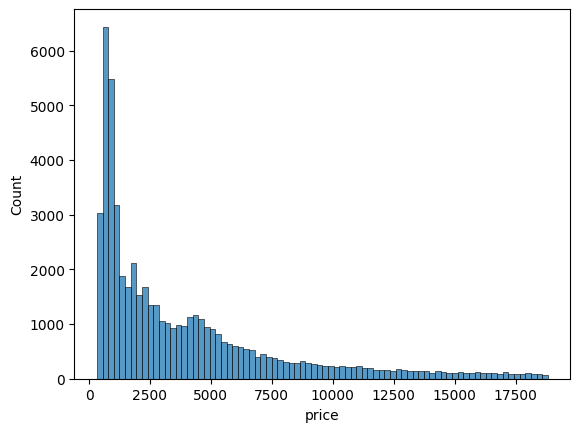

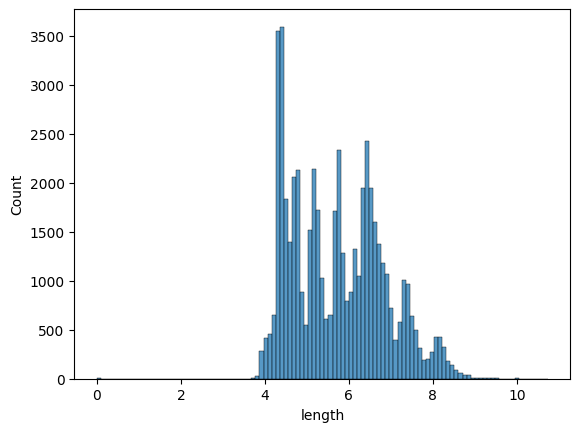

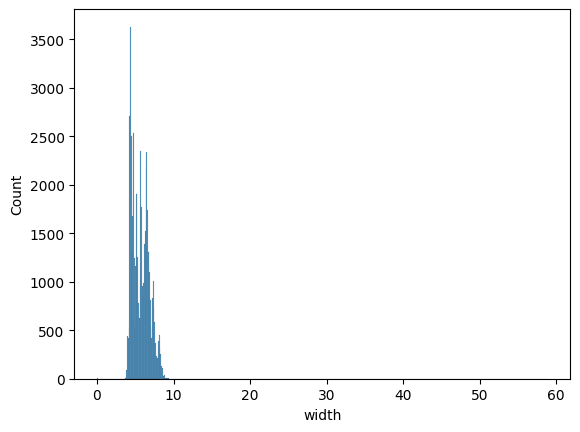

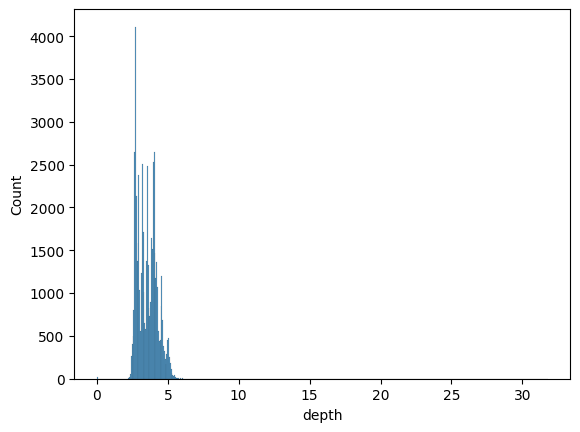

In [ ]:
for column in df.columns:
  hisplot(df[column])

Check out the categorical feature

In [ ]:
df['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [ ]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [ ]:
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [ ]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

Converting catagorical value to dummy variable otherwise the machine learning algorithm will not take categorical values as input:

##**One Hot Encoding**


The one hot encoding is perfomed on feature clarity and color to convert the categories in numeric form:

In [ ]:
clarity = pd.get_dummies(df['clarity'], drop_first = True)#drop a column to multicollinearity
color = pd.get_dummies(df['color'], drop_first = True)

##**Ordinal Encoding:**

The cut column contains ordinal values therefore ordinal encoding is best fit for this feature:

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_e = OrdinalEncoder(categories=[['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']])
df['cut'] = ord_e.fit_transform(df[['cut']])

In [ ]:
df.drop(['clarity', 'color'], axis = 1, inplace=True)

After convert the categorical data to numeric form let's concate these feature with dataframe:

In [ ]:
df = pd.concat([df, clarity, color], axis=1)

In [ ]:
df.head()

carat  cut  total depth %  table  price  length  width  depth     IF  \
0   0.23  0.0           61.5   55.0    326    3.95   3.98   2.43  False   
1   0.21  1.0           59.8   61.0    326    3.89   3.84   2.31  False   
2   0.23  3.0           56.9   65.0    327    4.05   4.07   2.31  False   
3   0.29  1.0           62.4   58.0    334    4.20   4.23   2.63  False   
4   0.31  3.0           63.3   58.0    335    4.34   4.35   2.75  False   

     SI1  ...    VS1    VS2   VVS1   VVS2      E      F      G      H      I  \
0  False  ...  False  False  False  False   True  False  False  False  False   
1   True  ...  False  False  False  False   True  False  False  False  False   
2  False  ...   True  False  False  False   True  False  False  False  False   
3  False  ...  False   True  False  False  False  False  False  False   True   
4  False  ...  False  False  False  False  False  False  False  False  False   

       J  
0  False  
1  False  
2  False  
3  False  
4   True  

[5 rows x 21 columns]

Correlation between the features

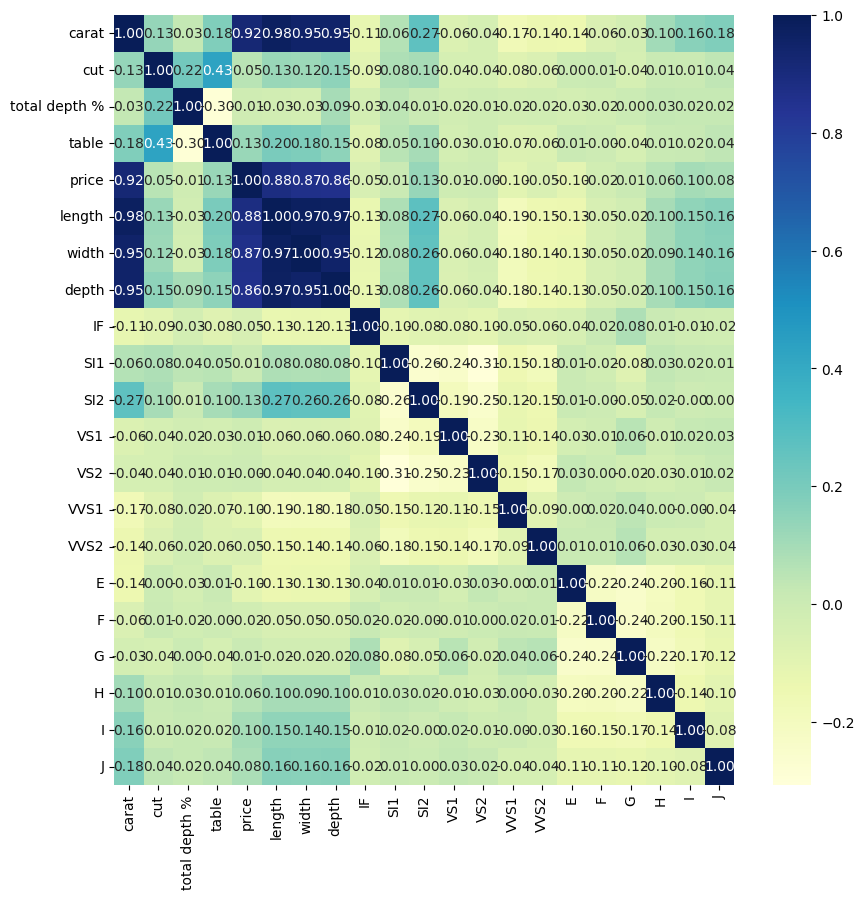

In [ ]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()

Drop duplicate rows

In [ ]:
df.drop_duplicates(inplace=True)

##Split dependent and independant features:

In [ ]:
x = df.drop('price', axis=1)

y = df['price']

##**Normalization:**

In [ ]:
from sklearn import preprocessing

preprocess = preprocessing.StandardScaler()

x_transform = preprocess.fit_transform(x)

y_reshape = np.array(y).reshape(-1, 1)
y_transform = preprocess.fit_transform(y_reshape)

##Splitting the training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_transform, y_transform, test_size=.20, random_state = 101)

##**Linear Regression:**

In [ ]:
from sklearn.linear_model import LinearRegression

linearReg = LinearRegression()

linearReg.fit(x_train, y_train)

LinearRegression()

##**Model Evaluation:**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# prediction
y_predicted = linearReg.predict(x_test)

# Calculate accuracy:
accuracy = r2_score(y_test, y_predicted)*100

# Mean Squared error:
mse = mean_squared_error(y_test, y_predicted)

# Root mean square:
rmse = np.sqrt(mse)

print("Linear Regression:\n", "--"*30)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Accurcay: ", accuracy)



Linear Regression:
 ------------------------------------------------------------
Mean Squared Error:  0.07987053016353023
Root Mean Squared Error:  0.2826137473010296
Accurcay:  91.8629741336772
